In [1]:
from keras.datasets import mnist
from keras.utils import to_categorical
from keras import models, layers

# Load MNIST data
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize pixel values to be between 0 and 1
X_train = X_train / 255.0
X_test = X_test / 255.0

# Reshape input data to 28x28 images (MNIST image size)
X_train = X_train.reshape((-1, 28, 28, 1))
X_test = X_test.reshape((-1, 28, 28, 1))

# Convert labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

# Define the CNN model
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # Output layer with 10 units for 10 classes
])

# Compile the model
cnn.compile(optimizer='SGD',          
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Train the model
cnn.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))






Epoch 1/5


1875/1875 [==============================] - 11s 5ms/step - loss: 0.5116 - accuracy: 0.8520 - val_loss: 0.1602 - val_accuracy: 0.9536
Epoch 2/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1449 - accuracy: 0.9562 - val_loss: 0.1162 - val_accuracy: 0.9623
Epoch 3/5
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1012 - accuracy: 0.9689 - val_loss: 0.0728 - val_accuracy: 0.9778
Epoch 4/5
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0816 - accuracy: 0.9754 - val_loss: 0.0697 - val_accuracy: 0.9775
Epoch 5/5
1875/1875 [==============================] - 10s 6ms/step - loss: 0.0698 - accuracy: 0.9785 - val_loss: 0.0637 - val_accuracy: 0.9811


In [2]:
cnn.evaluate(X_test,y_test)

313/313 [==============================] - 1s 5ms/step - loss: 0.0637 - accuracy: 0.9811


[0.0637344941496849, 0.9811000227928162]

In [3]:
y_pred = cnn.predict(X_test)
y_pred[:5]

313/313 [==============================] - 1s 3ms/step


array([[4.1276222e-09, 6.3068266e-09, 9.5806554e-06, 6.0406060e-06,
        4.2286709e-11, 3.9416186e-09, 2.6483603e-15, 9.9998343e-01,
        1.9189711e-08, 8.3545825e-07],
       [4.4889880e-06, 3.9447399e-04, 9.9959534e-01, 3.0227841e-07,
        2.8459621e-09, 5.2156595e-09, 1.8092047e-06, 1.2391874e-08,
        3.5899202e-06, 1.0931417e-11],
       [2.4896508e-05, 9.9854326e-01, 1.8309429e-04, 6.2654162e-06,
        2.1124205e-04, 9.4939418e-07, 1.2445063e-04, 5.8278872e-04,
        3.1808778e-04, 4.9084997e-06],
       [9.9984336e-01, 4.9140088e-08, 6.4447755e-05, 5.0414224e-07,
        7.8727385e-07, 4.5703356e-07, 6.3477339e-05, 1.5827620e-05,
        3.9236167e-07, 1.0639232e-05],
       [5.1912690e-07, 1.6174104e-07, 4.3748651e-07, 9.2296666e-08,
        9.9938560e-01, 1.1444605e-07, 1.4877287e-06, 1.3882670e-05,
        1.0031696e-06, 5.9668662e-04]], dtype=float32)

In [5]:
import numpy as np
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]   #First Five Classes

[7, 2, 1, 0, 4]

In [6]:
y_test[:5]   

array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

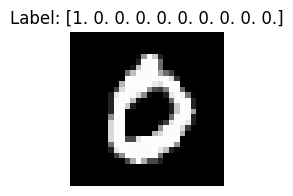

In [11]:
import matplotlib.pyplot as plt

def plot_sample(X, y, index):
   
    plt.figure(figsize=(2, 2))
    plt.imshow(X[index].reshape(28, 28), cmap='gray')  # Plot the image
    plt.title(f'Label: {y[index]}')  # Set the title with the corresponding label
    plt.axis('off')  # Turn off axis
    plt.show()

# Example usage:
plot_sample(X_test, y_test, 3)  # Plot the sample at index 3 from the test set


In [13]:
# Define class labels for the MNIST dataset
classes = ["0", "1", "2", "3", "4", "5", "6", "7", "8", "9"]

# Assuming y_classes is the predicted class labels
predicted_class = y_classes[3]  # Get the predicted class label
predicted_class_label = classes[predicted_class]  # Get the corresponding class label
print("Predicted class label:", predicted_class_label)


Predicted class label: 0


In [14]:
classes[y_classes[3]]

'0'

In [15]:
classes[y_classes[10]]

'0'